In [4]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

In [5]:
def f(x):
    return np.array([fun(xi) for xi in x])

In [6]:
def fun(x):
    return (x**2)*math.sin(2*math.pi*x)+0.7
    

In [7]:
class uniRandom:
    
    
    def __init__(self, size):
        self.size = size
        self.dataPoints = np.empty(shape = (100,2))
        self.labels = np.empty(100)
        self.classOneX = np.empty(shape = (0,0))
        self.classOneY = np.empty(shape = (0,0))
        self.classZeroX = np.empty(shape = (0,0))
        self.classZeroY = np.empty(shape = (0,0))
        self.num0 = 0
        for i in range(100):
            self.dataPoints[i] = np.array([np.random.uniform(0,1), np.random.uniform(0,1)])
            if fun(self.dataPoints[i][0]) > fun(self.dataPoints[i][1]):
                self.labels[i] = 0
                self.num0 += 1
            else:
                self.labels[i] = 1
                
    def assignClasses(self):
        self.classOneX = np.empty(shape = (self.size - self.num0,2))
        self.classOneY = np.empty(shape = (self.size - self.num0,2))
        self.classZeroX = np.empty(shape = (self.num0,2))
        self.classZeroY = np.empty(shape = (self.num0,2))
        
        counter0 = 0
        counter1 = 0
        for i in range(self.size):
            values = np.array([fun(self.dataPoints[i][0]), fun(self.dataPoints[i][1])])
            if(self.labels[i] == 0):
                self.classZeroX[counter0] = self.dataPoints[i]
                #print(self.dataPoints[i])
                self.classZeroY[counter0] = values
                counter0 += 1
            else:
                #print(self.dataPoints[i])
                self.classOneX[counter1] = self.dataPoints[i]
                self.classOneY[counter1] = values
                counter1 += 1


In [8]:
x = uniRandom(100)
x.assignClasses()

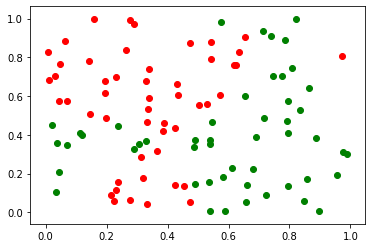

In [9]:
plt.scatter(x.classZeroX[:,0], x.classZeroX[:,1], color = 'r')
plt.scatter(x.classOneX[:,0], x.classOneX[:,1], color = 'g')

In [10]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [11]:
def array_for(x):
    return np.array([sigmoid(xi) for xi in x])

In [55]:
class network:
    
    #inner clas
    class layers:#form as the mesh between two layers
    
            def __init__(self, vec):
                self.weights = np.random.rand(vec[0],vec[1]) * 0.01
                self.bias = np.random.rand(vec[1])
                
    class neurons: #forms a set of nodes in our network
    
        def __init__(self, x):
            self.neurons = np.zeros(x)
    
        def len(self):
            return len(self.neurons)
    
        def update(self, x):
            self.neurons = x
        
        def getArray(self):
            return self.neurons
        
    
    def __init__(self, vec):
        self.layers = []
        #made up of layers with neurons
        for i in range(len(vec) - 1): #build up until the layer before the final layer
            self.layers.append(layers([vec[i], vec[i+1]]))
        
        self.neuronSet = []
        for i in range(len(vec)):
            self.neuronSet.append(neurons(vec[i])) #add the neurons for that specific layer, do this for each layer.
        
        #need some way to determine error, so here we have 2 classes therefore want to consider error the 'distance' from predicting the right class
        #hence make target class have 1 - sigmoidAtEndNeuron and the class that it must not be 
        # 0 - sigmoidAtEndNeuron
        #sum these two together to get the error
        def errorCalculate(self, targetIndex): #this will be low when network is certain and high when it is uncertain 
            
            '''
            Note with regard to this function, please note that from my current understanding what you want to do is just for one given input example you want to target
            what the classes should be and this will give you the error for that specific case, however you should note that this error is mainly just used to allow 
            for the use of descent https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html 
            As another note these should be used in conjungtion with back propagation. I will attempt to discuss that there
            '''
            
            indexEnd = len(self.neuronSet) - 1
            totalError = 0
            neurons = self.neuronSet[indexEnd].getArray()
            for i in range(len(neurons)): #architecture note, depends on only having one possible class you want it to be in 
                if i == targetIndex:
                    totalError = (1 - neurons[i])**2 + totalError #should be squared difference
                else:
                    totalError = neurons[i]**2 + totalError #since sigmoid cant be <0 and fact that we want classes we arent to be at 0 (so completely off)
            
            return totalError
        
        def forwardPropagate(self , outShape, data):
            out = np.empty(shape = (outshape[0],outShape[1]))
            size = len(data) #number of entries to go through
            for i in range(size):
                dataPoint = data[i]
                for j in range(len(self.layers) - 1): #run over each layer except for the last one
                    dataPoint = array_for(np.dot(dataPoint, self.layers[j].weights) + self.layers.bias[j])
          
            #could add some error calculation here
            out[i:,] = dataPoint
            
        def backPropagateHidden(): #require gradient of steepest descent in a form
            #start from the output and go back
            pass
        '''
        With regards to influence, think about the weight and the functions that are used in the activation i.e say o represents our sigmoid 
        o(w0a0 + w1a1 + ... wnan + bk) so we have 3 choices of things to change and nudge in the right step, thse things had influence on our current node
        so, the weights(represented with w), the previous neurons(a's) and finally our bias vector. Do not interact with the neurons as they are meant to be left,
        so instead interact with the weights or bias (preferably the weights). Since the weights have influence. We dont just do this for the target neuron, say for example
        class 0 or class 1 only, we do it for both of them (so in the case that the label was 1, we reduce the cost for the neuron representing label 1 i.e (1- guessedProb) **2
        and then for label 0 we say (-guessedProb)**2 since it should have been minimised) we then find out the changes that should have been made to all the weights, say for example
        w1 in the last layer, class 0 says it should increase by 0.18 and class 1 says it should decrease by 0.1 so we aggregate the changes they want,
        0.18 - 0.1 gives us what it should have for w1 by their aggregate demands on the changes.
        I recommend looking at 3Blue1Brown's video on this (forward propagation is contained in video 1, 2 explains cost w.r.t gradient of descent and 3 is backprop)
        '''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-55-634089508d42>, line 71)

In [54]:
x = network([10,5])
print(x.layers[0].weights.shape) 
print(x.layers[0].bias.shape)
print(x.neuronSet[0].len()) # in this simple network, index 0 is the input neurons
print(x.neuronSet[1].len()) # in this simple network, index 1 is the output neurons

(10, 5)
(5,)
10
5
